In [16]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset on Kaggle
[Dataset](https://www.kaggle.com/c/santander-customer-satisfaction/data)

In [18]:
# Loading dataset
df = pd.read_csv("winequality-red.csv")

In [19]:
df.shape

(1599, 12)

In [20]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [21]:
X = df.drop(labels = ["quality"], axis = 1)
y = df["quality"]

In [22]:
X.shape, y.shape

((1599, 11), (1599,))

In [23]:
# Separate into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [24]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

# Correlation

In [25]:
X_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.260120,0.652526,0.086667,0.096402,-0.172548,-0.128754,0.662828,-0.684389,0.179485,-0.070519
volatile acidity,-0.260120,1.000000,-0.560679,-0.007303,0.050844,-0.007593,0.078577,0.021748,0.245499,-0.269707,-0.193689
citric acid,0.652526,-0.560679,1.000000,0.129534,0.206415,-0.065997,0.030486,0.343667,-0.538999,0.313383,0.104508
residual sugar,0.086667,-0.007303,0.129534,1.000000,0.054682,0.188348,0.197923,0.342547,-0.063373,-0.000722,0.036483
chlorides,0.096402,0.050844,0.206415,0.054682,1.000000,0.008295,0.049347,0.206084,-0.271395,0.389251,-0.225617
free sulfur dioxide,-0.172548,-0.007593,-0.065997,0.188348,0.008295,1.000000,0.672317,-0.035732,0.079882,0.049843,-0.068556
total sulfur dioxide,-0.128754,0.078577,0.030486,0.197923,0.049347,0.672317,1.000000,0.067464,-0.045290,0.034481,-0.215734
density,0.662828,0.021748,0.343667,0.342547,0.206084,-0.035732,0.067464,1.000000,-0.331697,0.144996,-0.501398
pH,-0.684389,0.245499,-0.538999,-0.063373,-0.271395,0.079882,-0.045290,-0.331697,1.000000,-0.200005,0.206520
sulphates,0.179485,-0.269707,0.313383,-0.000722,0.389251,0.049843,0.034481,0.144996,-0.200005,1.000000,0.091544


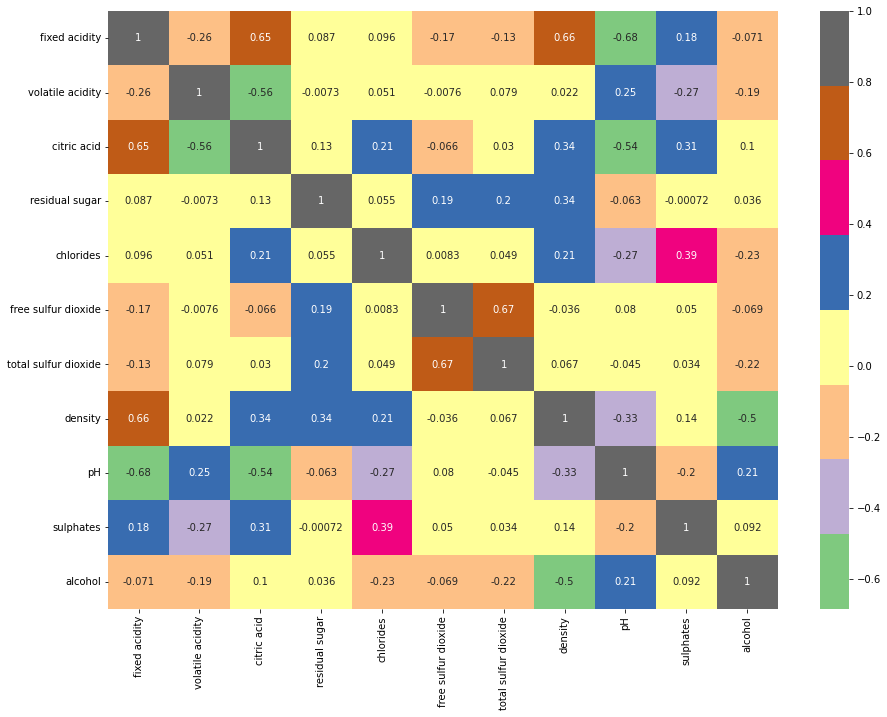

In [31]:
#Using Pearson Correlation
plt.figure(figsize=(15,11))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()

In [46]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
# Code copyright for sklearn webpage with some changes

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns to prevent duplicates
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train, 0.55)
len(set(corr_features))
# We are filtering highly (positive) correlated features and choosing on of them

4

In [48]:
corr_features

{'citric acid', 'density', 'pH', 'total sulfur dioxide'}

In [49]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
289,11.6,0.42,3.3,0.105,33.0,0.95,9.2
962,6.6,0.57,2.1,0.115,6.0,0.69,9.5
826,7.5,0.27,2.3,0.050,4.0,0.64,11.0
495,10.7,0.35,2.6,0.070,5.0,0.65,11.0
57,7.5,0.63,5.1,0.111,50.0,0.77,9.4
...,...,...,...,...,...,...,...
739,9.0,0.69,2.4,0.088,19.0,0.60,9.3
209,11.0,0.30,2.1,0.054,7.0,0.88,10.5
1552,6.3,0.68,3.7,0.103,32.0,0.66,11.3
1467,6.7,1.04,2.3,0.067,19.0,0.57,11.0
